# EDA - Exploratory Data Analysis

In this notebook we will start by Loading, Clean, and Explore the PM2.5 data of US Embassy in Beijing dataset.
Contents:
1. Loading the CSV with pandas
2. Sorting, Missing and Duplicated Values
3. Data Exploration:
    3.1. Missing Values Plot
    3.2. Count Plot
    3.3. Distribution Plot
    3.4. Pair Plot
    3.5. Correlation Plot
4. AutoViz


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
from datetime import datetime

## Loading CSV with Pandas plus 1st look into the data

In [2]:
#use pandas to load and convert the CSV
df = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")

In [3]:
#printing the 1st 10 lines of the dataframe

print(df.head(10))
print(df.shape)

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0   3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0   3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0   NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0   5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0   7.0   NaN  200.0  84.0  -1.9   
5   6  2013      3    1     5    4.0   4.0   9.0  25.0  300.0  78.0  -2.4   
6   7  2013      3    1     6    5.0   5.0  10.0  29.0  400.0  67.0  -2.5   
7   8  2013      3    1     7    3.0   6.0  12.0  40.0  400.0  52.0  -1.4   
8   9  2013      3    1     8    3.0   6.0  12.0  41.0  500.0  54.0  -0.3   
9  10  2013      3    1     9    3.0   6.0   9.0  31.0  400.0  69.0   0.4   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  

We can start by noticing that there 4 columns for date (year,month,day,hour), and 8 columns for variables.
Note that the **pm2.5** only has NaN values in the first 10 entries.



In [4]:
#drop indexing column
df = df.drop(columns=["No","station"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    35064 non-null  int64  
 1   month   35064 non-null  int64  
 2   day     35064 non-null  int64  
 3   hour    35064 non-null  int64  
 4   PM2.5   34314 non-null  float64
 5   PM10    34511 non-null  float64
 6   SO2     34401 non-null  float64
 7   NO2     33463 non-null  float64
 8   CO      31867 non-null  float64
 9   O3      34400 non-null  float64
 10  TEMP    35044 non-null  float64
 11  PRES    35044 non-null  float64
 12  DEWP    35044 non-null  float64
 13  RAIN    35044 non-null  float64
 14  wd      34986 non-null  object 
 15  WSPM    35050 non-null  float64
dtypes: float64(11), int64(4), object(1)
memory usage: 4.3+ MB
None


According to the dataset [source page](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data), each of the dataset columns is the following:
1. Year
2. Month
3. Day (of the month)
4. Hour
5. PM2.5: PM2.5 concentration (ug/m^3)
6. PM10: PM10 concentration (ug(m^3)
7. SO2:  SO2 concentration (ug/m^3)
8. NO2 concentration (ug/m^3)
9. CO concentration (ug/m^3)
10. O3: O3 concentration (ug/m^3)
11. TEMP: Temperature (ºC)
12. PRES: Pressure (hPa)
13. DEWP: Dew Point (ºC)
14. RAIN: precipitation (mm)
15. wd: wind direction (compass divided in 16 categories)
16. WSPM: wind speed (m/s)


**This hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included.**

The dataset **starts in 01.03.2013 and ends in 28.02.2017**.

We see that all columns, except column **cbwd**, are of numeric dtype, which is what we intend.
In this notebook we will only deal with EDA, so transforming the wind direction column into a numerical column will be done in a later notebook.

## Sorting, Missing, and Duplicate Rows

Lets be sure the dataframe is sorted, there is not an issue with missing rows (days) and there are no duplicate rows.

### Sorting and Missing Values

In [5]:
#be sure the df is sorted by date
df["Datetime"] = pd.to_datetime(df["day"].astype(str) +"/" +  df["month"].astype(str) + "/" + df["year"].astype(str) +" " + df["hour"].astype(str),format="%d/%m/%Y %H")

df.insert(0, 'Datetime', df.pop('Datetime'))
df.sort_values(by=["Datetime"])

#be sure there are no days missing
null_counter = df["Datetime"].isnull().sum()
print("The number of rows with NaN Date is:",null_counter)
print(df.head())

The number of rows with NaN Date is: 0
             Datetime  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO  \
0 2013-03-01 00:00:00  2013      3    1     0    9.0   9.0  3.0  17.0  300.0   
1 2013-03-01 01:00:00  2013      3    1     1    4.0   4.0  3.0  16.0  300.0   
2 2013-03-01 02:00:00  2013      3    1     2    7.0   7.0  NaN  17.0  300.0   
3 2013-03-01 03:00:00  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   
4 2013-03-01 04:00:00  2013      3    1     4    3.0   3.0  7.0   NaN  200.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  
0  89.0  -0.5  1024.5 -21.4   0.0  NNW   5.7  
1  88.0  -0.7  1025.1 -22.1   0.0   NW   3.9  
2  60.0  -1.2  1025.3 -24.6   0.0  NNW   5.3  
3   NaN  -1.4  1026.2 -25.5   0.0    N   4.9  
4  84.0  -1.9  1027.1 -24.5   0.0  NNW   3.2  


There aren't any rows with the date missing. As a matter of fact, when we previously called ***df.info()*** we saw that only the column **pm2.5** add missing values, more precisely 43824-41757=2067 missing entries. As said before, we will deal with those missing values in a latter notebook.

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  35064 non-null  datetime64[ns]
 1   year      35064 non-null  int64         
 2   month     35064 non-null  int64         
 3   day       35064 non-null  int64         
 4   hour      35064 non-null  int64         
 5   PM2.5     34314 non-null  float64       
 6   PM10      34511 non-null  float64       
 7   SO2       34401 non-null  float64       
 8   NO2       33463 non-null  float64       
 9   CO        31867 non-null  float64       
 10  O3        34400 non-null  float64       
 11  TEMP      35044 non-null  float64       
 12  PRES      35044 non-null  float64       
 13  DEWP      35044 non-null  float64       
 14  RAIN      35044 non-null  float64       
 15  wd        34986 non-null  object        
 16  WSPM      35050 non-null  float64       
dtypes: datetime6

### Delete duplicates

In [7]:
#delete duplicate rows
print(df.shape)
df.drop_duplicates()
print(df.shape)
#no duplicates if the output shape is the same



(35064, 17)
(35064, 17)


## Data exploration


We are now ready to explore the data: look for patterns, distributions, errors, and quirks in the data.


### Missing Values

<AxesSubplot: >

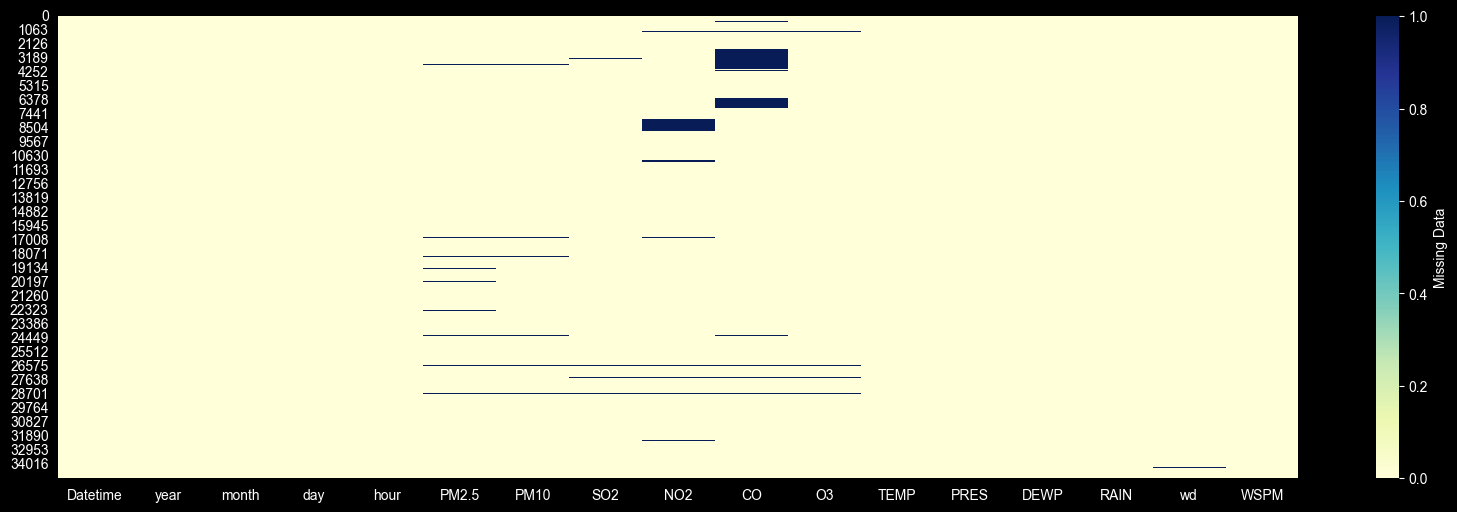

In [8]:
#Checking Missing Values
plt.figure(figsize=(20,6))
sns.heatmap(df.isna(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

As we can see there are days where most of the air quality variables (PM, S02,NO2,CO,O3) are missing ate the same time, days where only 1/2 are missing, or even days when only 1 is missing.

There is also big chunks of days where the variables **N02** and **CO** are missing, we will need to think about how we will deal with that in the Feature Engineering Phase. For now, we just want to note that there are indeed missing values, but they seem not be prominent. We can atest to that by plotting the percentage of missing values per column:

<Figure size 2000x600 with 0 Axes>

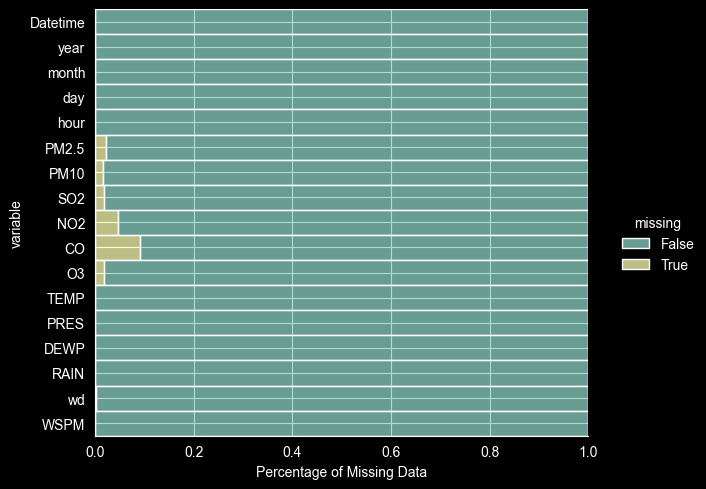

In [9]:
plt.figure(figsize=(20,6))
ax = sns.displot(data = df.isna().melt(value_name="missing"),y="variable",hue="missing",multiple="fill",aspect=1.25)
ax.set(xlabel="Percentage of Missing Data")
plt.show()

As we can see, the maximum missing values percentage is around 10%, which can be considered acceptable, and we will deal with later.

### Checking for non-unique entries count

year       5
month     12
hour      24
day       31
WSPM     101
CO       115
RAIN     119
SO2      392
PM2.5    582
PRES     595
DEWP     617
PM10     666
NO2      701
O3       737
TEMP     963
dtype: int64


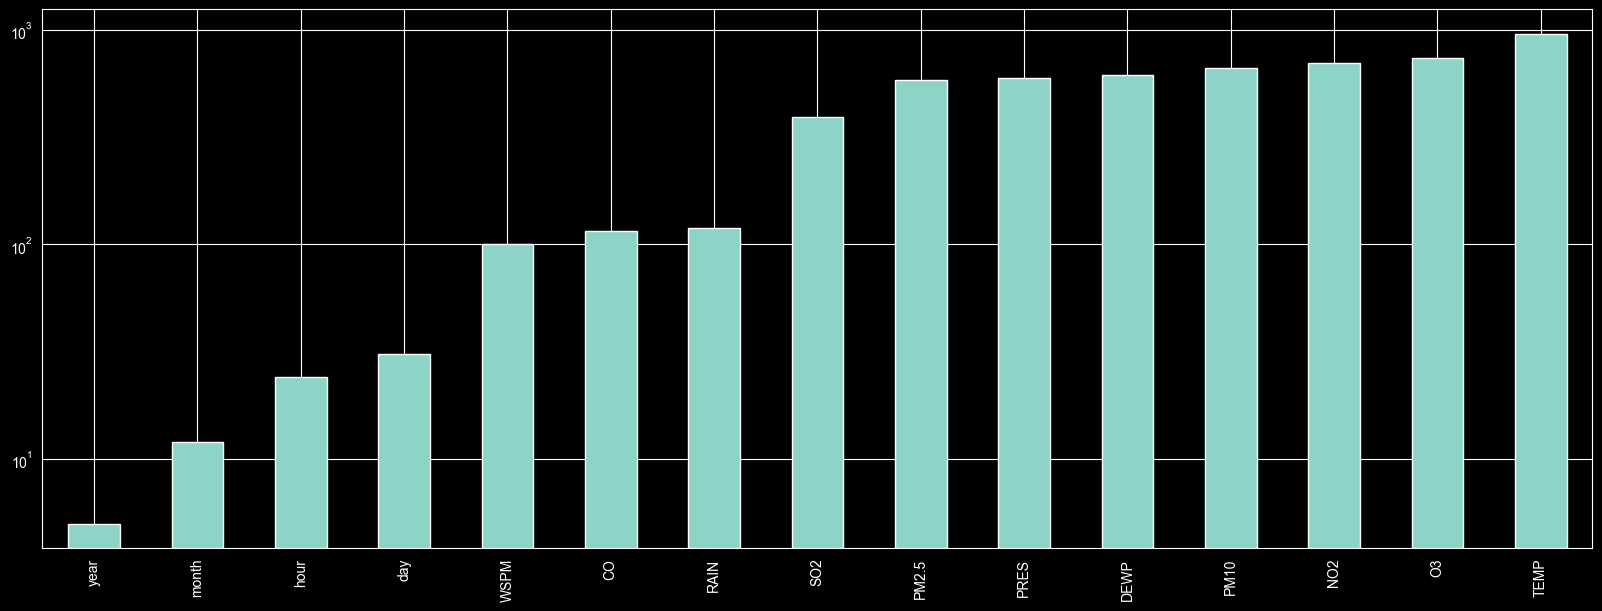

In [10]:
# how many non-unique entries does each column have?
unique_values = df.select_dtypes(include=('float',"int")).nunique().sort_values()
print(unique_values)
unique_values.plot(kind="bar",logy=True,figsize=(20,7))
plt.show()

Nothing out of the ordinary, no binary categories, years are 5, 12 months, 24 hours, 31 days per month, and they sensor measurements that should follow almost a continuous distri

### Variables distributions

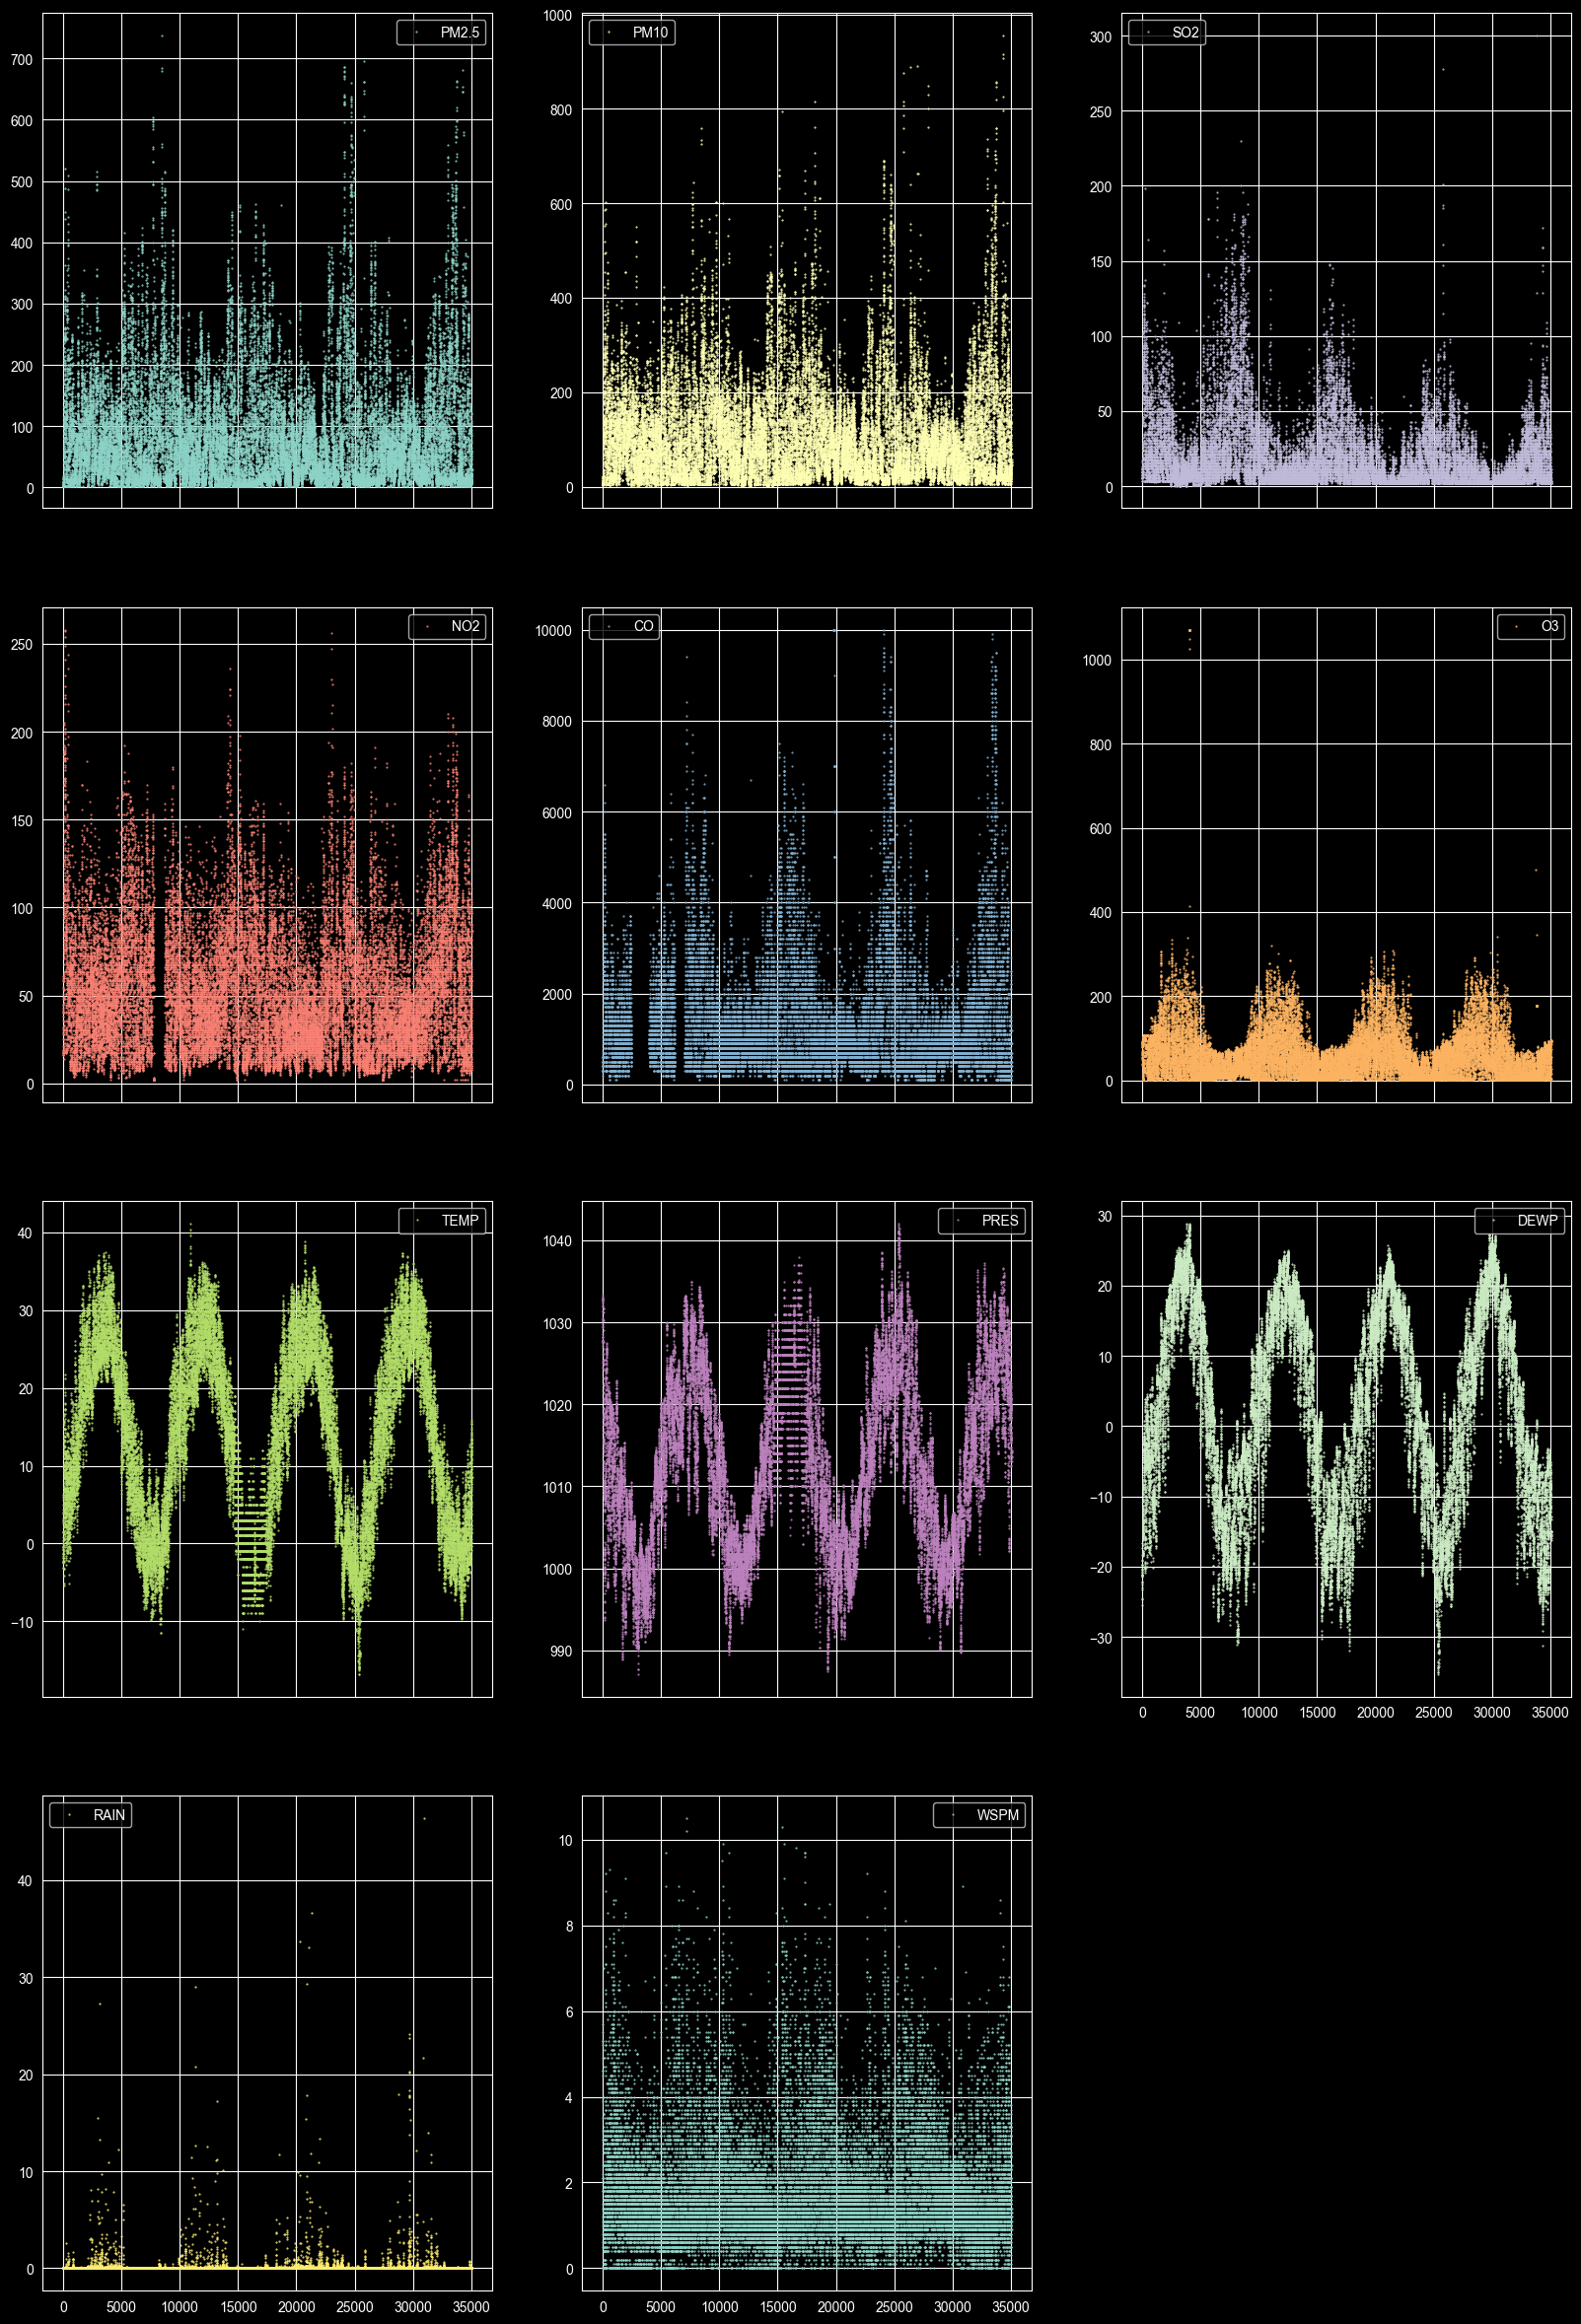

In [11]:
df.iloc[:,5:].plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(20, 30), markersize=1);



Some remarks after observing these plots:
1. There seems to be seasonality in all variables, which was expected.
2. The amount of rain (**RAIN**) at first sight seem to be wrong, but one has to think that it does not rain most of the days.

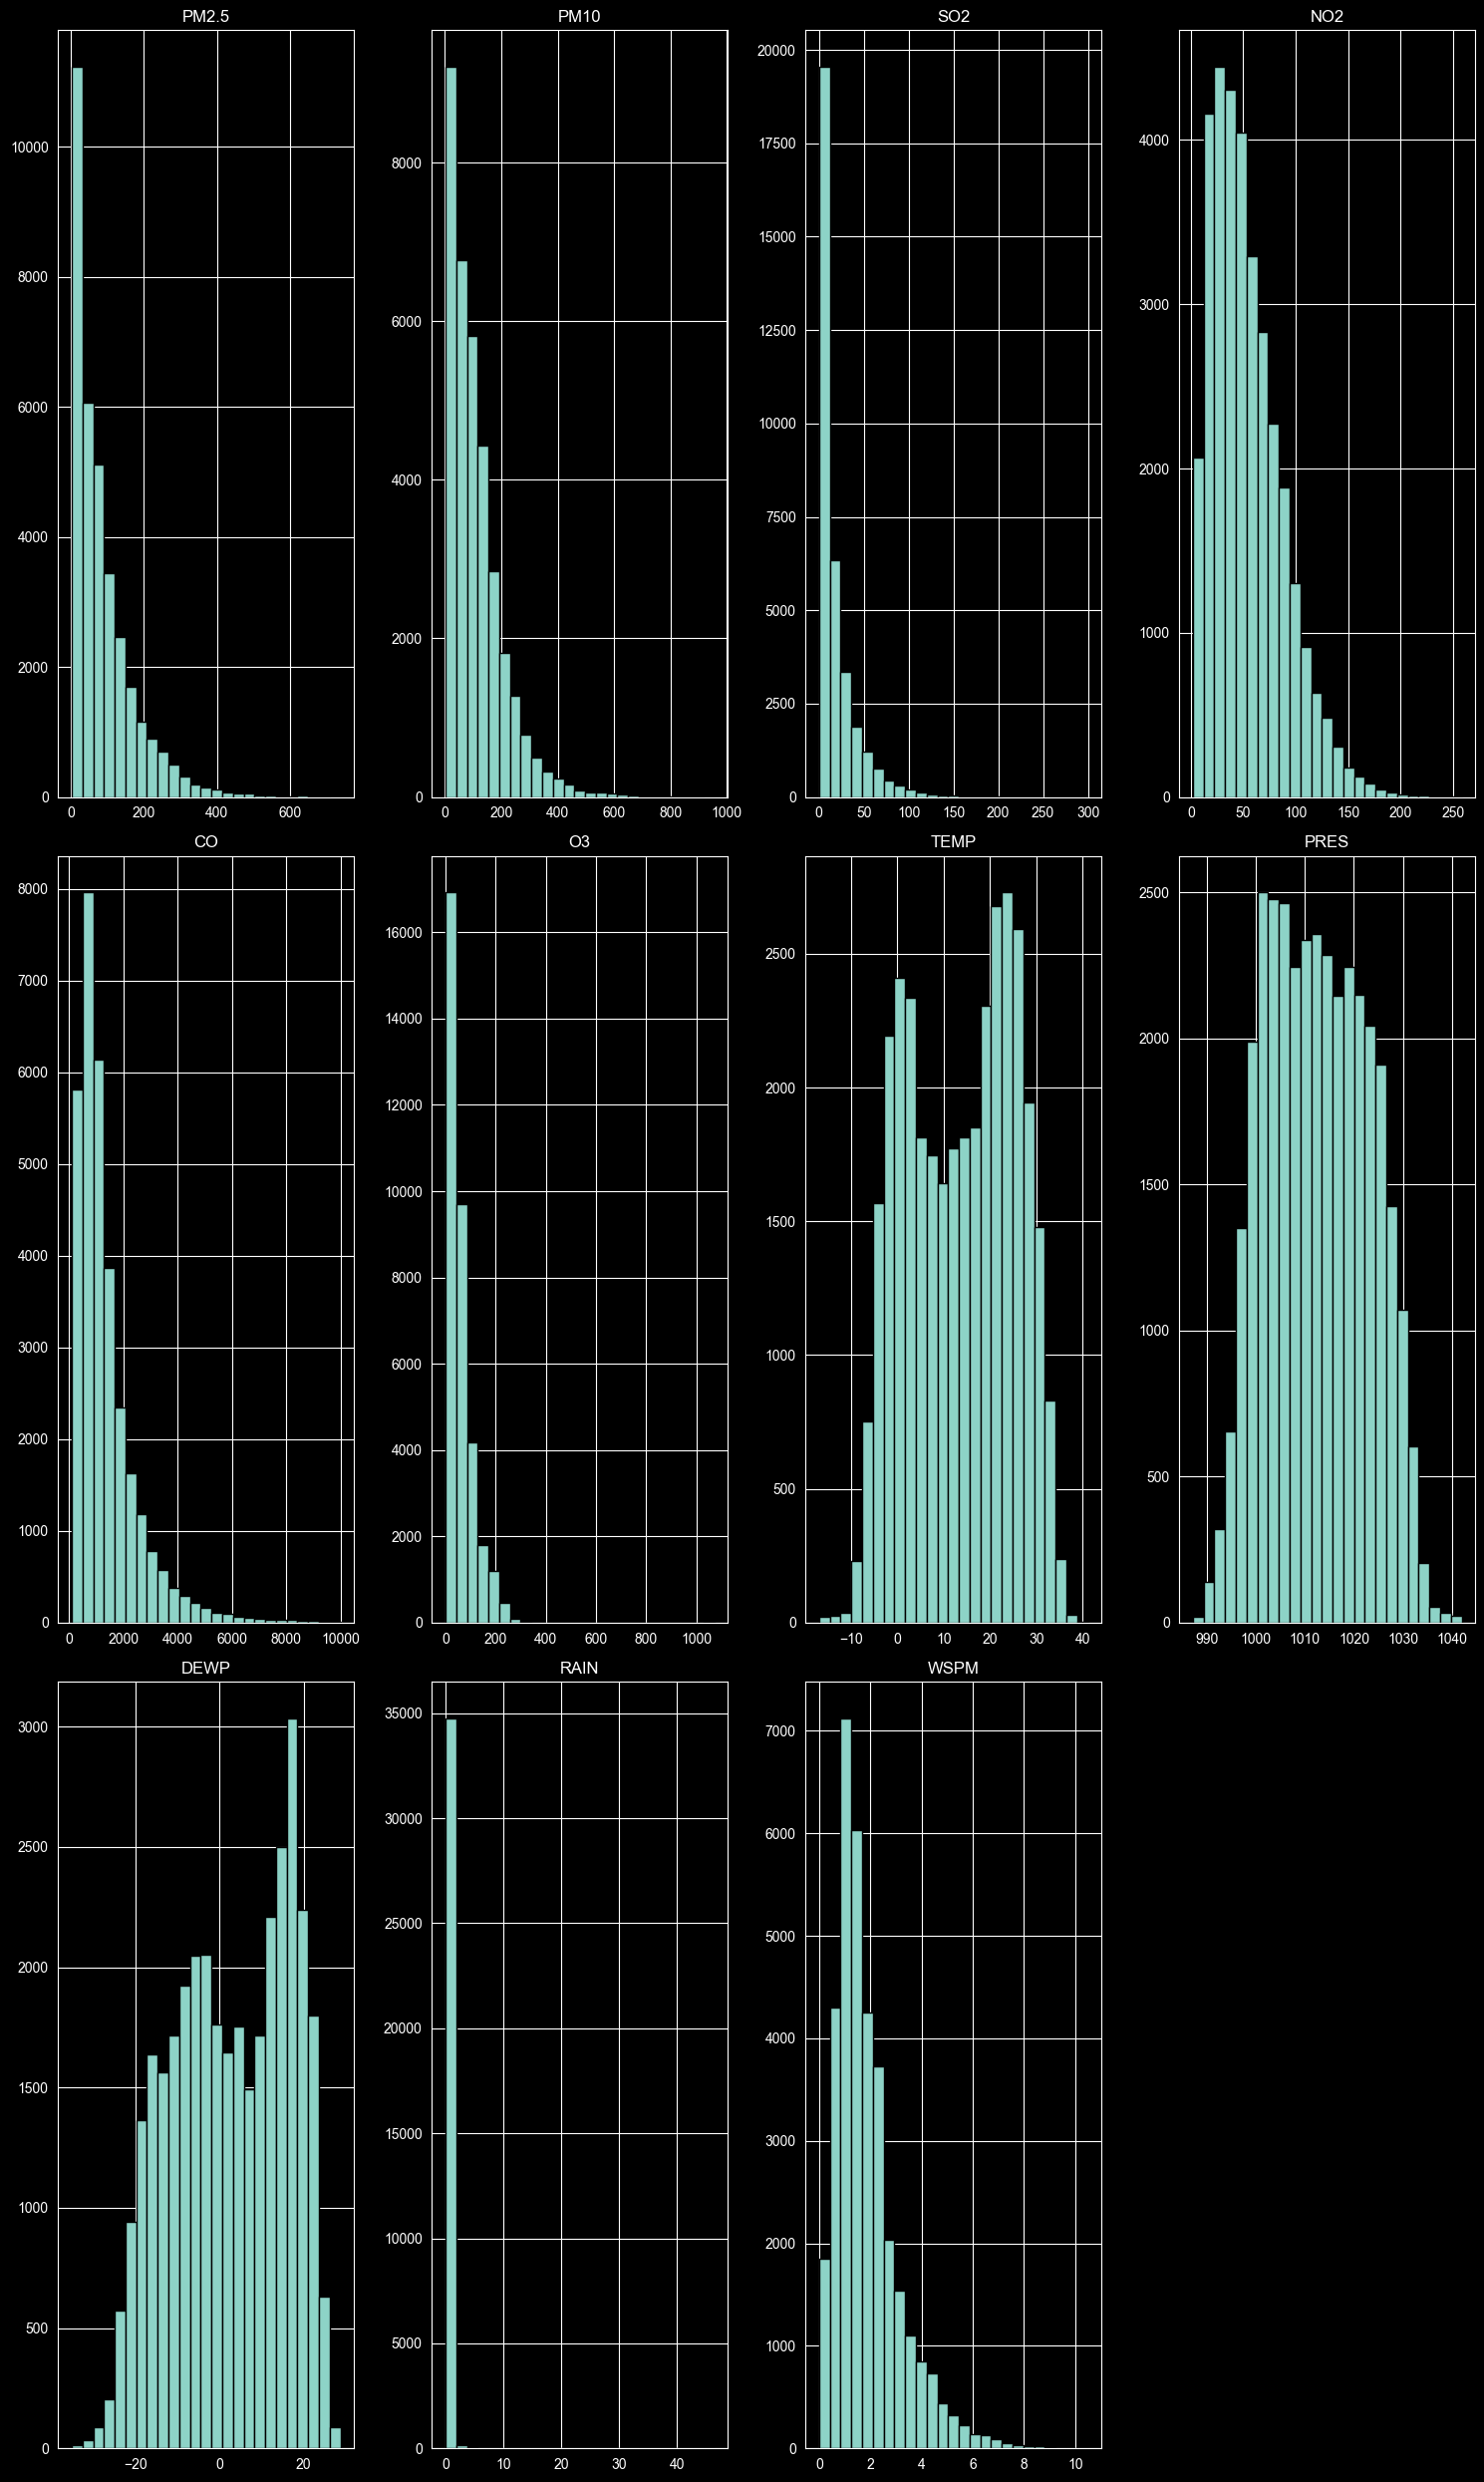

In [12]:
df.iloc[:,5:].hist(bins=25, figsize=(15, 25), layout=(-1, 4), edgecolor="black")
plt.tight_layout();

From these histograms we can remark that:
1. Once again is evident that rain(**lr**) is 0 in most of the days.
2. But now we clearly see that weather quality variables (**PM2.5**,**PM10**,**03**,**S02**, and **N02**) are all left skewed, and most of the time have near 0 values.
3. The weather related variables follow normal like distributions.

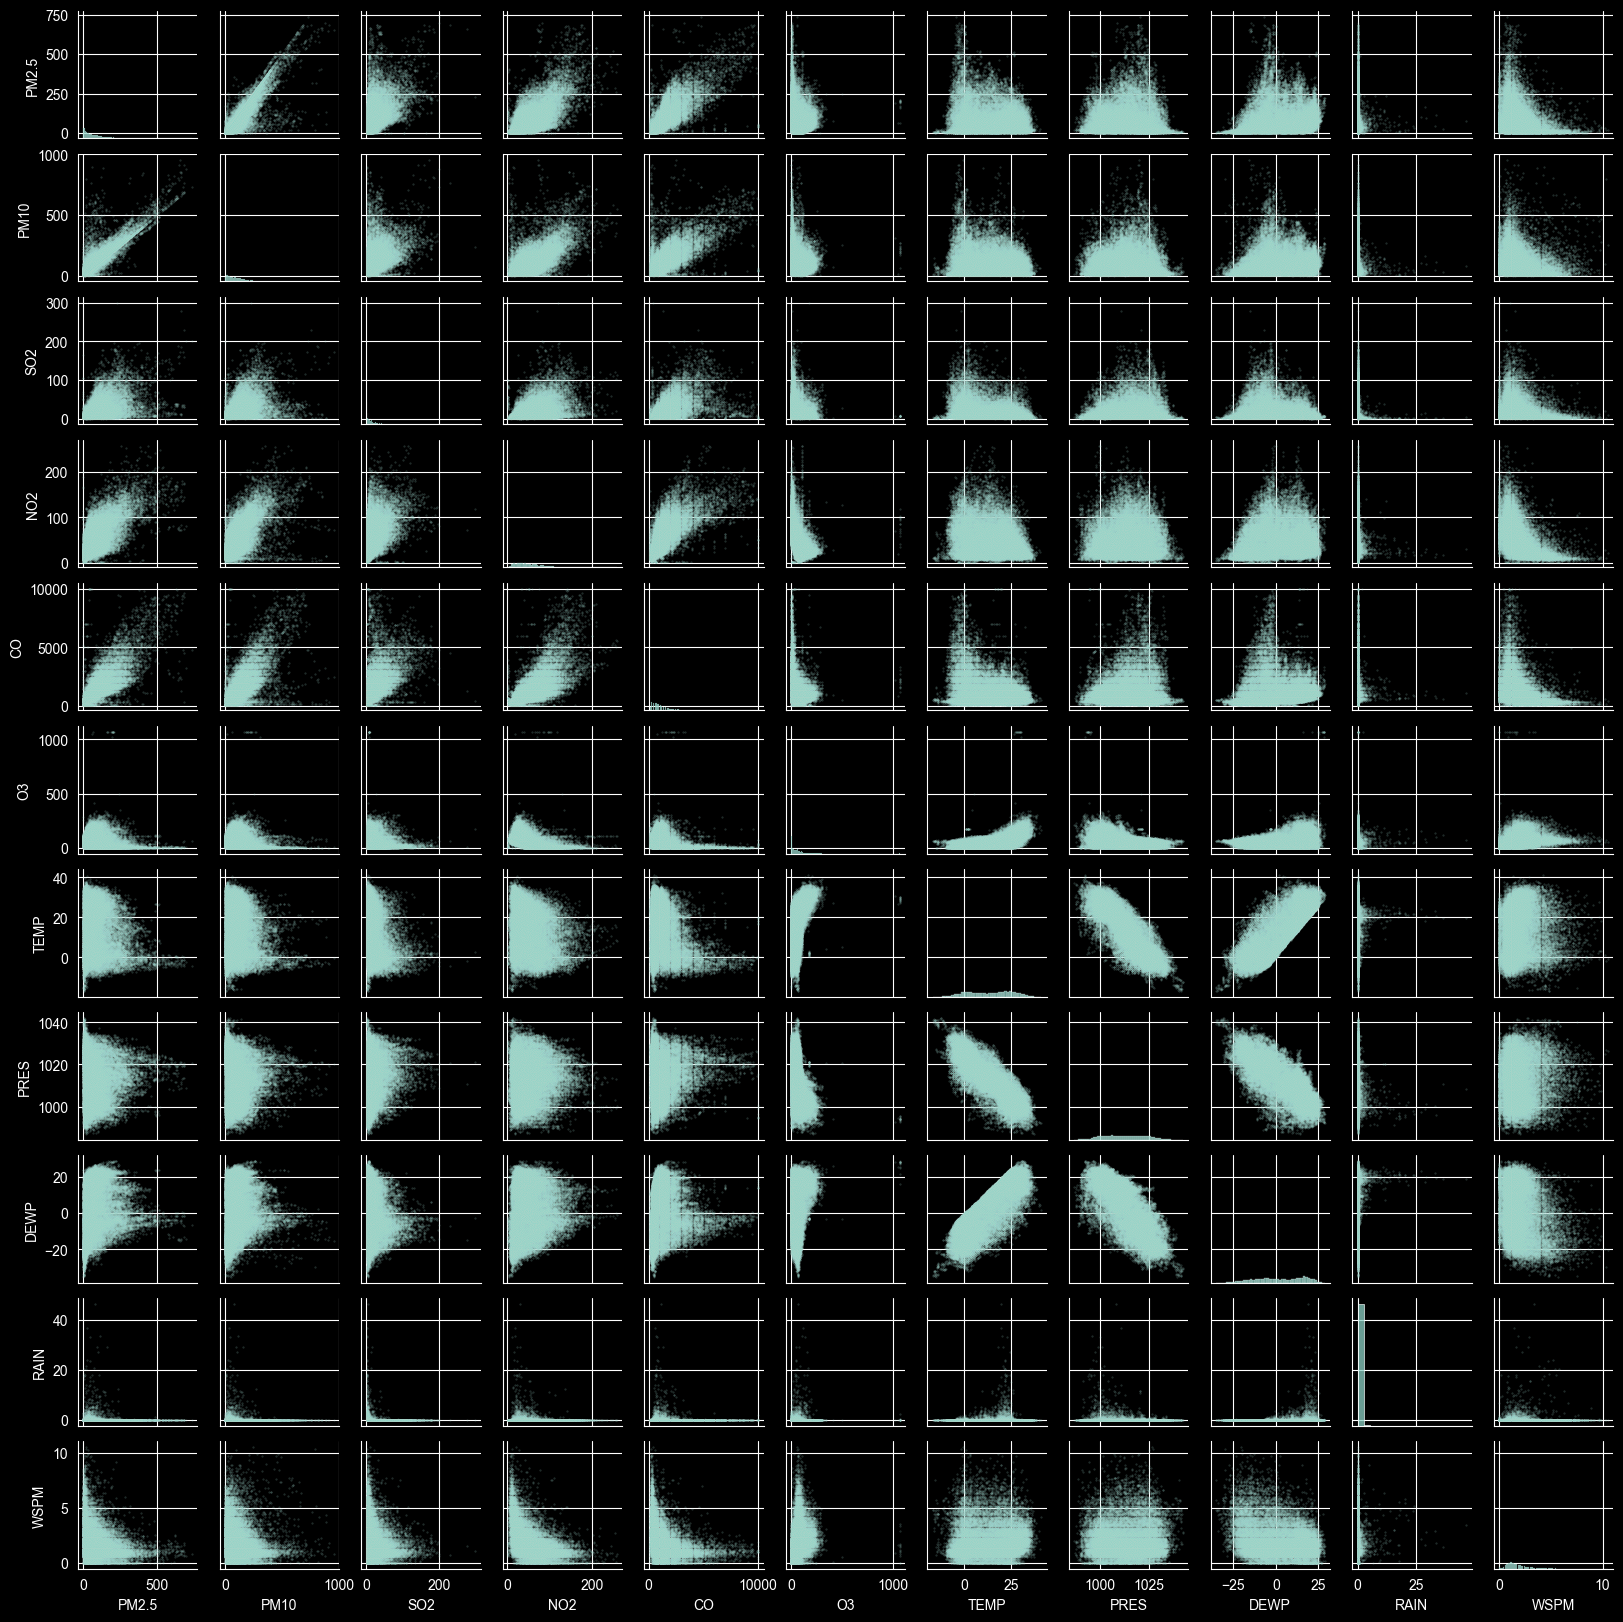

In [13]:
#check the pair plots to see if there is any evident relationship
sns.pairplot(df.iloc[:,5:], height=1.5, plot_kws={"s": 2, "alpha": 0.2});

By plotting the variables against each others, we can notice clear linear correlations in the upper left corner plus in the a small region in the down right corner where we have positive and negative strong correlations.

We can further inspect the correlation between each variable by plotting a correlation matrix.

C:\Users\J. Bastos\AppData\Local\Temp\ipykernel_2484\1531566401.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.iloc[:,5:].corr(method="pearson")


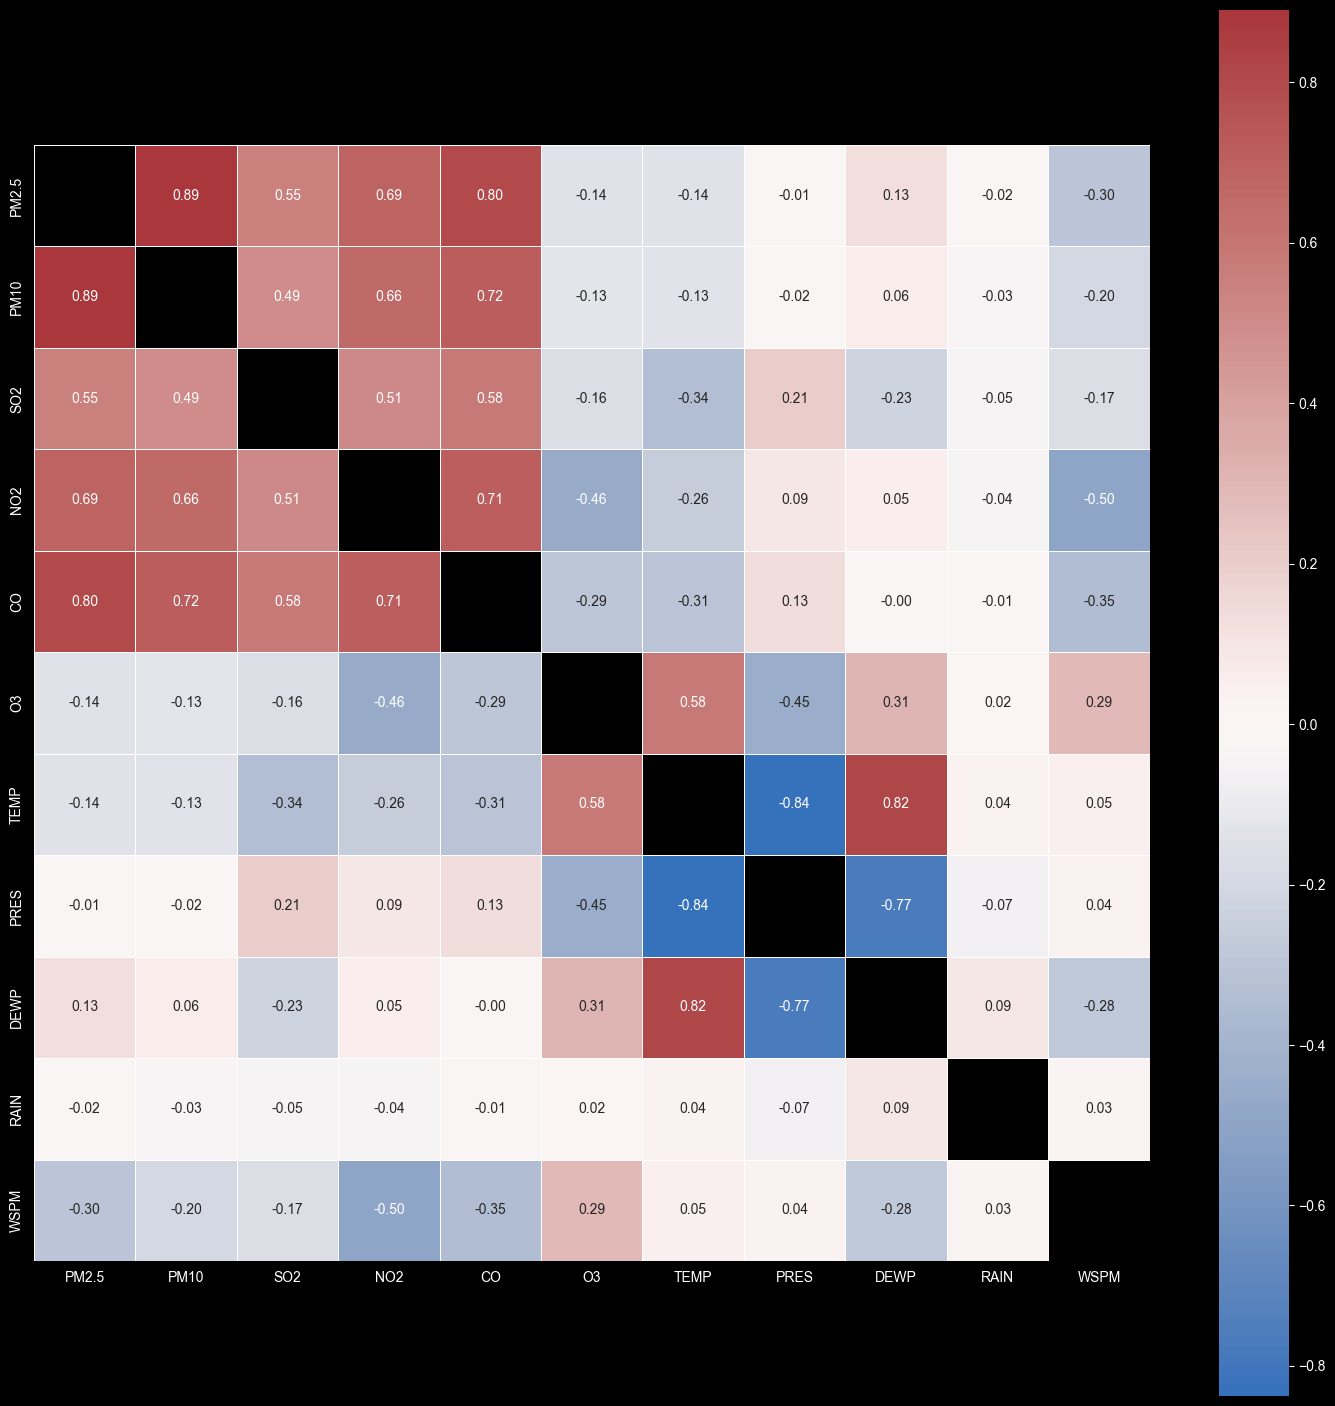

In [14]:

df_corr = df.iloc[:,5:].corr(method="pearson")

# Plot correlation matrix
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(df_corr, ax=ax, mask=np.eye(len(df_corr)), square=True,
            center=0, fmt='.2f', linewidths=.5,cmap="vlag",annot=True);

Once again, it's evident the correlation between the air quality variables (**PM2.5**,**PM10**,**03**,**S02**, and **N02**) in the upper right corner. And then a strong correlation between weather variables (temperature,dew point, and pressure) in the upper side of the down-right quadrant of the matrix.


## Save Dataframe in feather format

I end up choosing feather because I wanted to see how pandas performs while saving/loading a feather file (although this isn't a big dataframe).

In [15]:
df.to_feather(path="EDA_dataframe.feather")

## AutoViz - Quick and Automatic EDA

Nowadays, there are Python packages that automate EDA and make it simpler. Keeping in mind that tools like AutoViz add one level of abstraction between you and the data/code, it is a good idea eitehr to start the EDA with AutoViz or end with. This way you can etiher get good ideas/points for your EDA or confirm your ideas or even show you things you missed. Either way, AutoViz makes clean plots instantly.

In [20]:
from autoviz.AutoViz_Class import AutoViz_Class

#you can get a fast EDA with just 2 lines of code!
AV = AutoViz_Class()
dft = AV.AutoViz(filename="",dfte=df,chart_format="png",verbose=2) #verbose=2 saves plots in the same directory as the notebook under /AutoViz Folder, verbose=1 prints plots in notebook #although in Pycharm it was not working


Shape of your Data Set loaded: (35064, 17)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


  Printing upto 30 columns max in each category:
    Numeric Columns : ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
    Integer-Categorical Columns: ['month', 'day', 'hour']
    String-Categorical Columns: ['wd']
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: []
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: ['Datetime', 'year']
    ID Columns: []
    Columns that will not be considered in modeling: []
    17 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
   Columns to delete:
'   []'
   Boolean variables %s 
'   []'
   Categorical variables %s 
"   ['wd', 'month', 'day', 'hour']"
   Continuous variables %s 
("   ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', "
 "'RAIN', 'WSPM']")
   Discrete string variables %s 
'   []'
   Date and time variables %s 
"   ['Datetime', 'year']"
   ID

Here are some examples of the output from AutoViz:

### Bar Plots

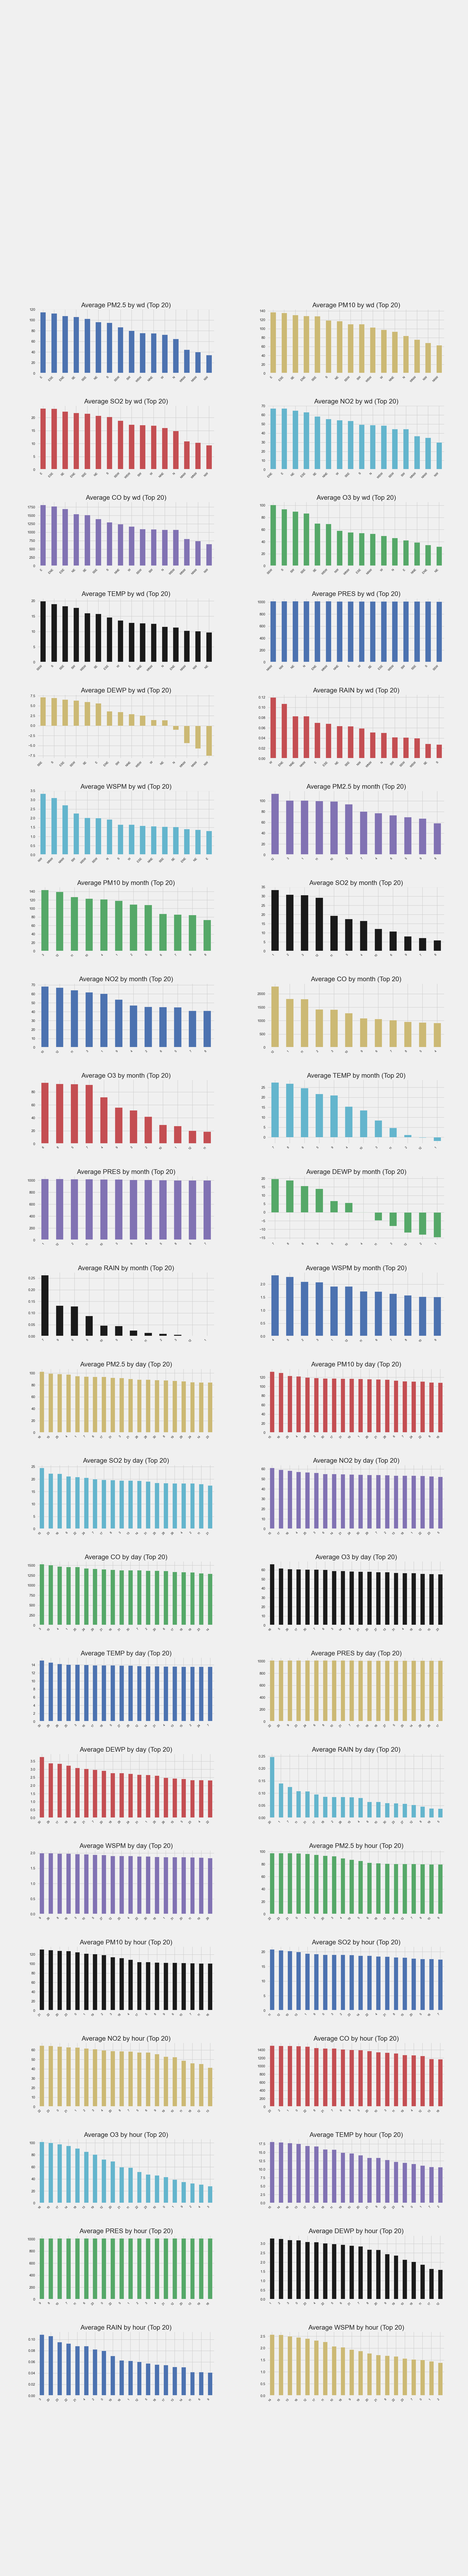

In [21]:
from IPython.display import Image
PATH = "AutoViz_Plots/AutoViz/Bar_Plots.png"
Image(filename = PATH, width=500, height=500)

### Distribution Plots

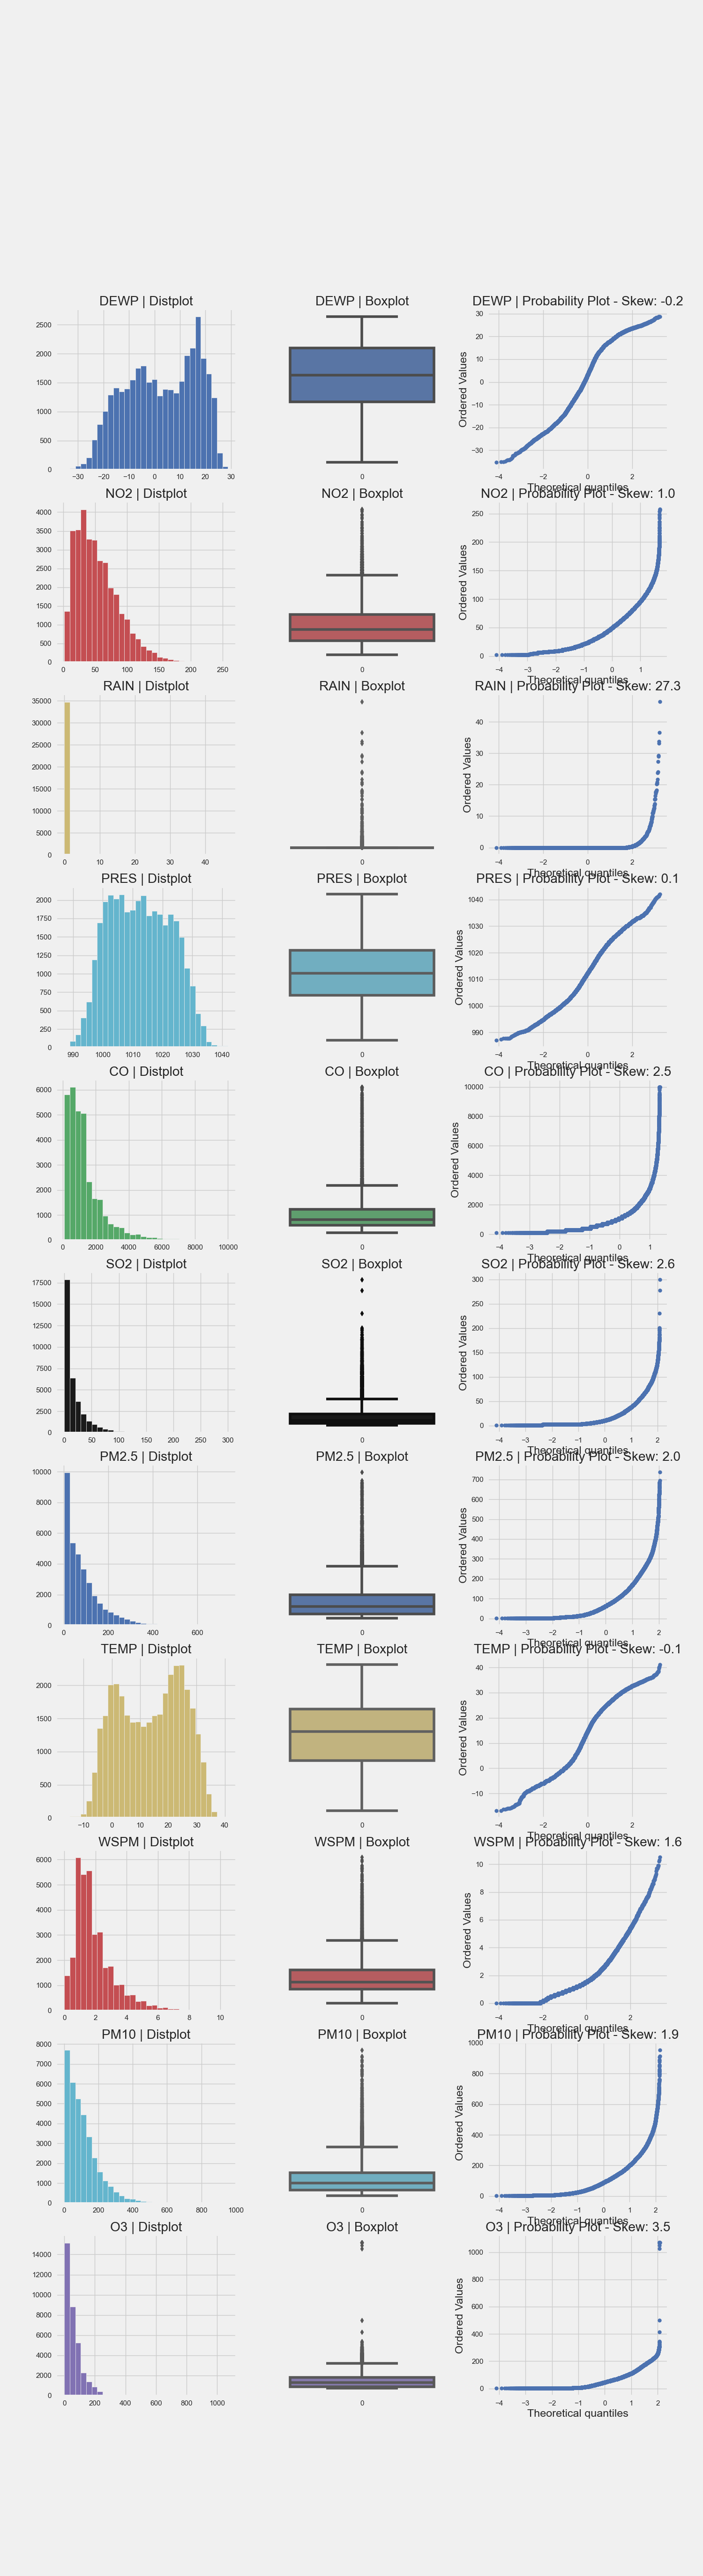

In [22]:
PATH = "AutoViz_Plots/AutoViz/Dist_Plots_Numeric.png"
Image(filename = PATH, width=500, height=500)